In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lib import DihedralAdherence
from lib import PDBMineQuery
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pathlib import Path
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'casp_da'

Initializing T1024 ...
Results already exist
Casp ID: T1024 	PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
Slope: -1.077774867148758, Intercept: 74.80392248148382 R-squared: 0.5579562098725406


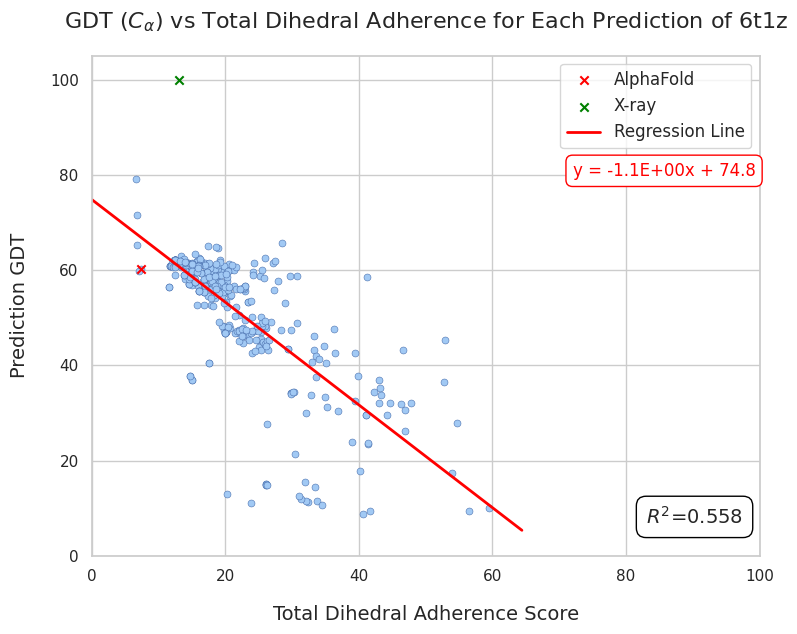

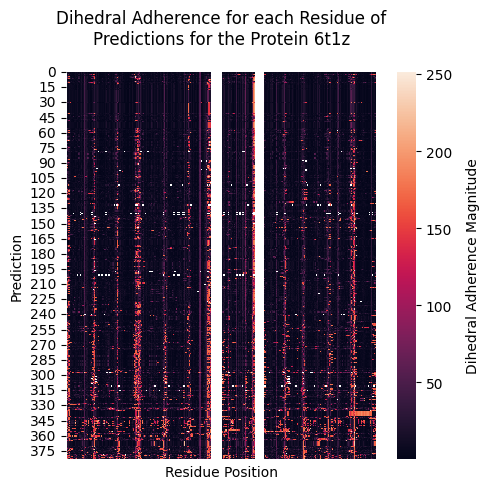

In [5]:
PDBMINE_URL = os.getenv("GREEN_PDBMINE_URL")
PROJECT_DIR = 'casp_da'
proteins = ['T1024', 'T1096', 'T1091', 'T1030', 'T1038', 'T1030-D2', 'T1024-D1',
             'T1032-D1', 'T1053-D1', 'T1027-D1', 'T1029-D1',
             'T1025-D1', 'T1028-D1', 'T1030-D1', 'T1053-D2', 'T1057-D1','T1058-D1', 'T1058-D2'
           ]
proteins = []
da = DihedralAdherence('T1024', [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128], 
                       mode='ml', weights_file='ml_data/best_model-kde_16-32_383.pt', device='cuda')
                    #    mode='weighted_kde_af')
# da.test_pdbmine_conn()
# da.compute_structures(replace=False)
# da.query_pdbmine()

da.load_results_da()
da.filter_nas(quantile=0.8)
# rsquared, pearsonr = da.test_correlation()
# da.filter_nas(quantile=0.7)
# results = pd.concat([q.results for q in da.queries])
# print(results.groupby('phi').size().sort_index(ascending=False).head())
# results.describe().loc[['min','max'], ['phi','psi']]
# print(da.xray_phi_psi.describe().loc[['min','max'], ['phi','psi']])
# da.phi_psi_predictions.describe().loc[['min','max'], ['phi','psi']]
# da.plot_da_for_seq()
# da.plot_dist_kde(percentile=0.50)
# both = da.plot_res_vs_da()
# da.plot_da_vs_gdt()
da.plot_da_vs_gdt_simple()
# print(da.grouped_preds.da_na.describe())
# print(da.grouped_preds[da.grouped_preds.da_na > da.grouped_preds.da_na.quantile(0.9)].shape)
# da.plot_res_vs_da(da.protein_ids[0], highlight_res=((159,163),(187,191),(373,377)), legend_loc='upper left', text_loc='left')
# print((~np.isnan(da.grouped_preds_da.values)).sum(axis=1).mean())
# print((~np.isnan(da.grouped_preds_da.values)).sum(axis=1).std())
da.plot_heatmap(fillna=False, fillna_row=False)
# print(da.grouped_preds[da.grouped_preds.protein_id==da.get_id('337_5')].RMS_CA)
# rmsds, n, rmsd_inner = da.split_and_compute_rmsd(pred_id=da.protein_ids[0], split=[(48,48),(49,49),(76, 76),(106,106),(107,107)])
# rmsds, n, rmsd_inner = da.split_and_compute_rmsd(pred_id=da.protein_ids[0], split=[(161,161), (189,189), (362,375)])

In [3]:
for casp_id in ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028']:
    try:
        da = DihedralAdherence(casp_id, [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128], mode='kde_af')
        # da.query_pdbmine()
        # da.compute_structures(replace=False)
        da.load_results()
        da.compute_das(replace=True)
    except Exception as e:
        print(f"{casp_id} - Error: {e}")

Results already exist
Casp ID: T1024 	PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
0/393: GKEFWNL
	Win 4: EFWN - 201 samples
	Win 5: KEFWN - 56 samples
	Win 6: KEFWNL - 0 samples
	Win 7: GKEFWNL - 0 samples
	Weighted n samples: 537.0
	0 predictions
No predictions seq GKEFWNL
1/393: KEFWNLD
	Win 4: FWNL - 350 samples
	Win 5: EFWNL - 19 samples
	Win 6: EFWNLD - 0 samples
	Win 7: KEFWNLD - 0 samples
	Weighted n samples: 464.0
	484 predictions
2/393: EFWNLDK
	Win 4: WNLD - 260 samples
	Win 5: FWNLD - 8 samples
	Win 6: FWNLDK - 0 samples
	Win 7: EFWNLDK - 0 samples
	Weighted n samples: 308.0
	484 predictions
3/393: FWNLDKN
	Win 4: NLDK - 2339 samples
	Win 5: WNLDK - 23 samples
	Win 6: WNLDKN - 0 samples
	Win 7: FWNLDKN - 0 samples
	Weighted n samples: 2477.0
	484 predictions
4/393: WNLDKNL
	Win 4: LDKN - 2174 samples
	Win 5: NLDKN - 39 samples
	Win 6: NLDKNL - 8 samples
	Win 7: WNLDKNL - 0 samples
	Weighted n samples: 2464.0
	484 predictions
5/393: NLDKNLQ
	Win 4: DKNL - 2907 samples
	Win

In [ ]:
from lib.fit_model_on_multiple import fit_lr, plot_md_vs_rmsd
import os
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'tests'

# model, grouped_preds = fit_model_on_multiple(['T1056', 'T1038', 'T1025', 'T1028'], WINDOW_SIZE, WINDOW_SIZE_CONTEXT, PDBMINE_URL, n_comp=2000)
model, grouped_preds = fit_lr(
    ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025'],
    # ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028'],
    [4,5,6,7], [1,32,64,128],
    PDBMINE_URL, PROJECT_DIR,
    n_comp=2000,
)
plot_md_vs_rmsd(grouped_preds, axlims=((0,60), (0,80)))